# Описание работы и постановка задачи

В данной работе рассмотрен метод Парето для выделения наиболее значимых фрагментов данных, что становится основой для создания эффективных моделей прогнозирования. Метод реализован на реальных данных о поступивших заявках на сервисное обслуживание одного из ведущих отечественных автопроизводителей.
### Методика 
В данной методике применяется метод Парето для выделения наиболее значимых примеров в данных, используемых для обучения модели. Этот подход основывается на принципе 80/20, согласно которому примерно 80% результатов достигается за счет 20% причин. В контексте анализа данных это означает, что относительно небольшое количество объектов может оказывать значительное влияние на общие результаты модели. Для определения ключевых примеров мы оцениваем вклад каждого объекта в общую вариацию данных и отбираем те, которые находятся в верхних процентах по значимости. Объекты, не соответствующие установленным критериям значимости, классифицируются как менее важные и могут быть исключены из дальнейшего анализа. Также, принцип  Парето позволяет оптимизировать вычислительные ресурсы.
### Задача
Выделить значимые примеры в данных при помощи алгоритма, основанного  на принципе метода Парето.
### Дополнительная задача
Выделить равномерный фрагмент данных, а именно данные, собранные с одинаковыми временными интервалами в один день. Это особенно важно для повышения точности прогнозов, поскольку модели более эффективно обучаются на последовательных и предсказуемых данных. 


# Подключение необходимых библиотек

In [213]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Настройка стиля графиков

In [214]:
sns.set(context = 'paper', style='whitegrid', palette = 'deep')
plt.rcParams['font.family'] = 'Arial'

In [215]:
# установка общего размера шрифта для всех элементов графиков
plt.rcParams['font.size'] = 14  # размер шрифта по умолчанию
plt.rcParams['axes.titlesize'] = 16  # размер шрифта заголовка осей
plt.rcParams['axes.labelsize'] = 14  # размер шрифта подписей осей
plt.rcParams['xtick.labelsize'] = 12  # размер шрифта меток на оси X
plt.rcParams['ytick.labelsize'] = 12  # размер шрифта меток на оси Y

# Чтение данных

In [216]:
path = "/Users/user/Desktop/данные/data.csv"
df = pd.read_csv(path)

# Предварительный анализ и обработка данных

In [217]:
df

,service_id,service_name,model,component,product_id,product_part1_id,product_part2_id,date_in,date_out,mileage,warranty,labor_cost,operating_time,service_price,part_price,materials_price,general_price,defect_id,defect_name,causer
0,44360,САМАРА,11183,2915004,2,236,724743,2023-01-18,2023-01-18,15208,10,1.42,310.0,440.0,814.0,0,1254.0,2915004024000,ТEЧЬ AМOРТИЗA,51000
1,44360,САМАРА,11183,6106082,2,236,724743,2023-01-18,2023-01-18,15208,15,0.20,310.0,62.0,1.0,0,63.0,6106082083000,УСТАНОВКА ШАЙ,30000
2,44360,САМАРА,11183,5402334,2,236,724743,2023-01-18,2023-01-18,15208,15,0.80,310.0,248.0,0.0,0,248.0,5402334000000,ДЕФЕКТ ОКАНТО,0
3,44360,САМАРА,11183,1001157,2,236,724743,2023-01-18,2023-01-18,15208,15,0.68,310.0,211.0,2.0,0,213.0,1001157086000,НЕ ЗАКРЕПЛЕН,30000
4,44360,САМАРА,11183,1703050,2,236,729174,2023-01-31,2023-01-31,15365,10,9.61,310.0,2979.0,437.0,185,3600.0,1703050000000,ДЕФЕКТ МЕХАНИ,30000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230470,44560,ТОЛЬЯТТ,21703,3724026,69297,69719,527342,2024-12-25,2024-12-26,94,10,0.30,321.0,96.0,0.0,0,96.0,3724026086000,СЛАБОЕ КРЕПЛЕ,4000
1230471,64460,ОМСК ОА,21703,5325010,69956,70430,5332,2024-12-29,2024-12-29,95,10,1.15,282.0,324.0,0.0,0,324.0,5325010067000,НEКAЧEСТВEННЫ,4520
1230472,44588,ТОЛЬЯТТ,21703,8118022,70140,70676,179498,2024-12-25,2024-12-25,9,10,0.50,311.0,156.0,11.0,0,166.0,8118022183000,ОБРЫВ ЦЕПИ ДО,51000
1230473,44588,ТОЛЬЯТТ,21703,8118020,70154,70585,179537,2024-12-26,2024-12-27,12,10,1.02,311.0,317.0,645.0,0,963.0,8118020000000,ДЕФЕКТ ЭЛЕКТР,51000


In [218]:
#  проверка типов данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230475 entries, 0 to 1230474
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   service_id        1230475 non-null  int64  
 1   service_name      1230475 non-null  object 
 2   model             1230475 non-null  int64  
 3   component         1230475 non-null  int64  
 4   product_id        1230475 non-null  int64  
 5   product_part1_id  1230475 non-null  int64  
 6   product_part2_id  1230475 non-null  int64  
 7   date_in           1230475 non-null  object 
 8   date_out          1230475 non-null  object 
 9   mileage           1230475 non-null  int64  
 10  warranty          1230475 non-null  int64  
 11  labor_cost        1230475 non-null  float64
 12  operating_time    1230475 non-null  float64
 13  service_price     1230475 non-null  float64
 14  part_price        1230475 non-null  float64
 15  materials_price   1230475 non-null  int64  
 16  

In [219]:
# изменение типа данных
df['date_in'] = pd.to_datetime(df['date_in'])

# Поиск однородных данных и фильтрация датафрейма

In [220]:
# выбор и сортировка всех уникальных дат
dates = df['date_in'].sort_values().unique()

In [221]:
# функция, которая ищет максимальное количество подряд идущих дат с интервалом в 1 день
# [count,[start, end_]]: count - количество таких дат, [start, end_] - временной интервал в котором они находятся
def filtered_dates(dates):
    start = dates[0]
    end_ = start
    count = 1  
    count_delta = [count,[start, end_]]
    for date in dates[1:]:
        count += 1
        if (date-end_).days != 1:
            start = date
            end_ = date
            count = 1
            continue 
        end_ = date
        if count_delta[0] <= count:
            count_delta[0] = count
            count_delta[1] = [start, end_]
    return count_delta

In [222]:
# применение функции
count_delta = filtered_dates(dates)

In [223]:
# вывод результата
count_delta

[466, [Timestamp('2022-11-20 00:00:00'), Timestamp('2024-02-28 00:00:00')]]

In [224]:
# выделение временного интервала в котором все даты идут с интервалом в 1 день (интервал с максимальным количеством таких дат)
delta = count_delta[1]

In [225]:
delta

[Timestamp('2022-11-20 00:00:00'), Timestamp('2024-02-28 00:00:00')]

In [226]:
# фильтрация основного датафрейма
df_new = df[(df['date_in'] >= delta[0]) & (df['date_in'] <= delta[1])].copy()

In [227]:
df_new.head(5) 

,service_id,service_name,model,component,product_id,product_part1_id,product_part2_id,date_in,date_out,mileage,warranty,labor_cost,operating_time,service_price,part_price,materials_price,general_price,defect_id,defect_name,causer
0,44360,САМАРА,11183,2915004,2,236,724743,2023-01-18,2023-01-18,15208,10,1.42,310.0,440.0,814.0,0,1254.0,2915004024000,ТEЧЬ AМOРТИЗA,51000
1,44360,САМАРА,11183,6106082,2,236,724743,2023-01-18,2023-01-18,15208,15,0.20,310.0,62.0,1.0,0,63.0,6106082083000,УСТАНОВКА ШАЙ,30000
2,44360,САМАРА,11183,5402334,2,236,724743,2023-01-18,2023-01-18,15208,15,0.80,310.0,248.0,0.0,0,248.0,5402334000000,ДЕФЕКТ ОКАНТО,0
3,44360,САМАРА,11183,1001157,2,236,724743,2023-01-18,2023-01-18,15208,15,0.68,310.0,211.0,2.0,0,213.0,1001157086000,НЕ ЗАКРЕПЛЕН,30000
4,44360,САМАРА,11183,1703050,2,236,729174,2023-01-31,2023-01-31,15365,10,9.61,310.0,2979.0,437.0,185,3600.0,1703050000000,ДЕФЕКТ МЕХАНИ,30000


# Приведение данных к формату ML и фильтрация полученной таблицы

In [228]:
# приведение необходимых нам данных к формату ML
ML = df.pivot_table(index='date_in', columns='service_id', aggfunc='size')

In [229]:
ML

service_id,10363,10460,10461,10901,10960,11560,11703,11785,11790,11791,...,66365,66463,67063,67065,67263,67563,68063,68163,69063,69363
date_in,,,,,,,,,,,,,,,,,,,,,
2022-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-26,2.0,NaN,60.0,5.0,31.0,7.0,18.0,16.0,NaN,NaN,...,NaN,NaN,NaN,NaN,6.0,NaN,5.0,6.0,NaN,5.0
2024-12-27,NaN,NaN,39.0,10.0,29.0,NaN,7.0,33.0,2.0,NaN,...,NaN,10.0,NaN,NaN,2.0,NaN,2.0,6.0,NaN,3.0
2024-12-28,2.0,NaN,12.0,7.0,12.0,NaN,4.0,10.0,NaN,2.0,...,NaN,7.0,NaN,NaN,6.0,NaN,NaN,6.0,NaN,NaN


In [230]:
# доля пропусков в каждой строке  полученной таблицы 
ML.isna().mean(axis=1).sort_index()

date_in
2022-01-09    0.997024
2022-01-27    0.997024
2022-04-15    0.997024
2022-04-18    0.997024
2022-04-24    0.997024
                ...   
2024-12-26    0.425595
2024-12-27    0.494048
2024-12-28    0.514881
2024-12-29    0.627976
2024-12-30    0.877976
Length: 816, dtype: float64

In [231]:
# просмотр пропусков в первых 20 строках
ML.isna().mean(axis=1).sort_index()[0:20]

date_in
2022-01-09    0.997024
2022-01-27    0.997024
2022-04-15    0.997024
2022-04-18    0.997024
2022-04-24    0.997024
2022-05-18    0.997024
2022-06-01    0.997024
2022-06-17    0.997024
2022-08-01    0.997024
2022-08-26    0.997024
2022-09-06    0.994048
2022-09-07    0.997024
2022-09-09    0.997024
2022-09-13    0.997024
2022-09-14    0.997024
2022-09-15    0.997024
2022-09-20    0.997024
2022-09-21    0.997024
2022-09-26    0.997024
2022-09-28    0.997024
dtype: float64

In [232]:
# фильтрация таблицы
ML = ML[ML.isna().mean(axis=1) < 0.9]

In [233]:
# заполнение пропусков
ML = ML.fillna(0)

In [234]:
# изменение типа данных
ML = ML.astype('int')

In [235]:
ML

service_id,10363,10460,10461,10901,10960,11560,11703,11785,11790,11791,...,66365,66463,67063,67065,67263,67563,68063,68163,69063,69363
date_in,,,,,,,,,,,,,,,,,,,,,
2022-12-29,2,3,0,0,0,0,0,20,0,0,...,3,0,0,0,0,0,0,0,0,0
2022-12-30,0,0,5,0,0,0,0,40,0,0,...,11,0,0,0,0,0,0,0,1,0
2022-12-31,3,0,2,0,0,0,0,46,0,0,...,2,0,0,0,0,0,0,0,0,0
2023-01-03,0,0,19,0,0,1,0,50,0,0,...,7,0,0,0,0,0,0,0,0,0
2023-01-04,15,0,18,0,22,6,0,69,1,0,...,15,0,0,0,0,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-26,2,0,60,5,31,7,18,16,0,0,...,0,0,0,0,6,0,5,6,0,5
2024-12-27,0,0,39,10,29,0,7,33,2,0,...,0,10,0,0,2,0,2,6,0,3
2024-12-28,2,0,12,7,12,0,4,10,0,2,...,0,7,0,0,6,0,0,6,0,0


# Редукция данных при помощи Парето-аназиза

In [236]:
# вычисление общего числа заявок
total_profit = len(df_new)

In [237]:
total_profit 

723790

In [238]:
# вычисление 80% от общего числа заявок
target_profit = total_profit * 0.8

In [239]:
# подсчет количества заявок в каждом сервисе
service_requests = df_new.groupby('service_id').agg('size').sort_values(ascending=False).reset_index().rename(columns={0: 'count'})

In [240]:
# пусть все индексы начинаются с 1
service_requests.index = service_requests.index + 1  # Установка нового индекса, начиная с 1

In [241]:
service_requests

,service_id,count
1,44360,43796
2,11785,29705
3,44560,22892
4,45460,22749
5,42060,18818
...,...,...
231,45406,2
232,42702,2
233,62502,1
234,17364,1


In [242]:
# вычисление кумулятивной суммы заявок
accumulated_profit = service_requests[['count']].cumsum()

In [243]:
# пересечеие таблиц по индексам
accumulated_profit = service_requests.merge(accumulated_profit, how='left', left_index=True, right_index=True)

In [244]:
accumulated_profit 

,service_id,count_x,count_y
1,44360,43796,43796
2,11785,29705,73501
3,44560,22892,96393
4,45460,22749,119142
5,42060,18818,137960
...,...,...,...
231,45406,2,723785
232,42702,2,723787
233,62502,1,723788
234,17364,1,723789


In [245]:
# выделение нужных столбцов
accumulated_profit = accumulated_profit[['service_id','count_y']]

In [246]:
accumulated_profit 

,service_id,count_y
1,44360,43796
2,11785,73501
3,44560,96393
4,45460,119142
5,42060,137960
...,...,...
231,45406,723785
232,42702,723787
233,62502,723788
234,17364,723789


In [247]:
# переименование столбца
accumulated_profit = accumulated_profit.rename(columns={'count_y': 'cumsum'})

In [248]:
accumulated_profit

,service_id,cumsum
1,44360,43796
2,11785,73501
3,44560,96393
4,45460,119142
5,42060,137960
...,...,...
231,45406,723785
232,42702,723787
233,62502,723788
234,17364,723789


In [249]:
# нахождение сервисов, которые приносят 80% заявок
top_service = accumulated_profit[accumulated_profit['cumsum'] <= target_profit]

In [250]:
top_service 

,service_id,cumsum
1,44360,43796
2,11785,73501
3,44560,96393
4,45460,119142
5,42060,137960
6,60360,155152
7,19860,172276
8,30563,188669
9,45070,204178
10,39263,218479


In [251]:
# количество сервислв, которые приносят 80% заявок
l = len(top_service)

In [252]:
l 

59

# Визуализация рейтинга автосервисов

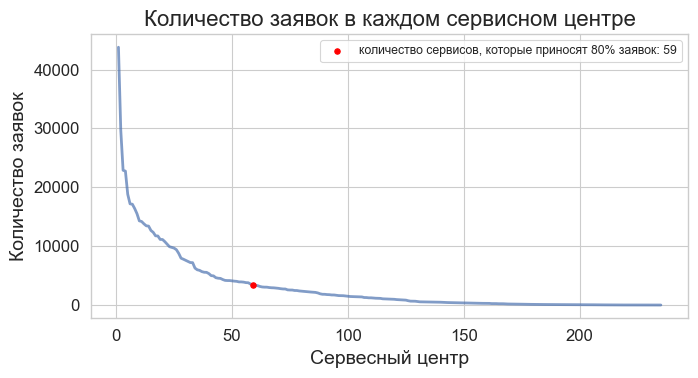

In [253]:
# построение графика
plt.figure(figsize=(7.2, 4))
plt.plot(service_requests.index, service_requests['count'], linewidth=2, linestyle='-', alpha=0.7)
plt.scatter(l, service_requests.iloc[l, 1], color='red', s=15, zorder=5, label=f'количество сервисов, которые приносят 80% заявок: {l}')

# настройка графика
plt.title('Количество заявок в каждом сервисном центре')
plt.xlabel('Сервесный центр')
plt.ylabel('Количество заявок')

# автоматическая настраивает параметры подграфиков
plt.tight_layout()

# добавление легенды
plt.legend()

# показ графиков
plt.show()

# Визуализация портретов локаций

#### Портрет локации — это некая кривая, характеризующая изменение характеристики с течением времени в данной локации.

### В нашем случае:

#### Характеристика — количество заявок

#### Локация —  автосервис

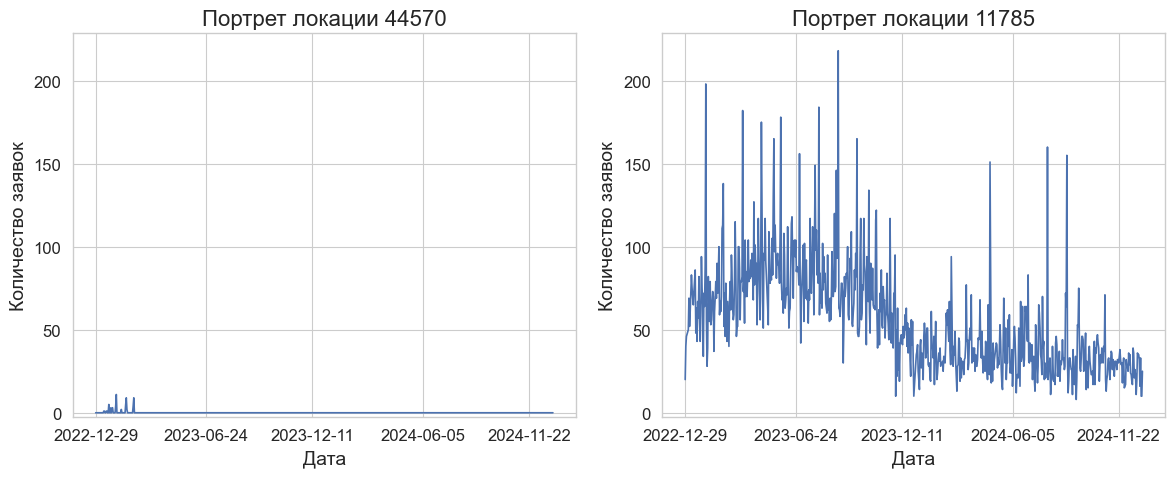

In [255]:
# создаем фигуру с 1 строкой и 2 колонками
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# первый график
axs[0].plot(ML.index, ML[44570])
axs[0].set_title('Портрет локации 44570')
axs[0].set_xlabel('Дата')
axs[0].set_ylabel('Количество заявок')

# второй график 
axs[1].plot(ML.index, ML[11785])
axs[1].set_title('Портрет локации 11785')
axs[1].set_xlabel('Дата')
axs[1].set_ylabel('Количество заявок')

# получение лимитов осей
x_limits = axs[1].get_xlim()  # Получаем лимиты оси X
y_limits = axs[1].get_ylim()  # Получаем лимиты оси Y

# установка пределов для оси X для изменения масштаба
axs[0].set_xlim(x_limits[0], x_limits[1])  # Установите желаемый диапазон

# установка пределов для оси Y для изменения масштаба
axs[0].set_ylim(y_limits[0], y_limits[1])  # Установите желаемый диапазон

ind = list(ML.index[::170])
axs[1].set_xticks(ind)
axs[0].set_xticks(ind)

# автоматическая настраивает параметры подграфиков
plt.tight_layout()

# показ графиков
plt.show()